In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# leitura dos dados
df = pd.read_csv('/content/nyc-rolling-sales.csv')

In [4]:
# Verificação dos dados
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [5]:
# Eliminando colunas desnecessárias
df=df.drop(columns=['Unnamed: 0'])
df.drop('EASE-MENT', axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12792 entries, 0 to 12791
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         12792 non-null  int64 
 1   NEIGHBORHOOD                    12792 non-null  object
 2   BUILDING CLASS CATEGORY         12792 non-null  object
 3   TAX CLASS AT PRESENT            12792 non-null  object
 4   BLOCK                           12792 non-null  int64 
 5   LOT                             12792 non-null  int64 
 6   EASE-MENT                       12792 non-null  object
 7   BUILDING CLASS AT PRESENT       12792 non-null  object
 8   ADDRESS                         12792 non-null  object
 9   APARTMENT NUMBER                12792 non-null  object
 10  ZIP CODE                        12792 non-null  int64 
 11  RESIDENTIAL UNITS               12792 non-null  int64 
 12  COMMERCIAL UNITS                12792 non-null

In [8]:
# contar o número de ocorrências do caractere "-"
contagem = df.applymap(lambda x: str(x).count("-"))
# contando o número de espaços em branco em cada elemento do DataFrame.
contagem_space = df.applymap(lambda x: str(x).count(" "))
# exibindo as contatas
print(f"there is {contagem.sum().sum()} '-' and {contagem_space.sum().sum()} spaces")

there is 66532 '-' and 377970 spaces


In [9]:
# substitui os caracteres '-' e ' ' por valores NaN (Not a Number)
map_dict={'-':np.nan,' ':np.nan}
df.replace(map_dict,inplace = True)

In [10]:
# Verificando a quantia de linhas duplicadas
sum(df.duplicated())


162

In [11]:
df.isnull().sum()

BOROUGH                              0
NEIGHBORHOOD                         0
BUILDING CLASS CATEGORY              0
TAX CLASS AT PRESENT               237
BLOCK                                0
LOT                                  0
BUILDING CLASS AT PRESENT          237
ADDRESS                              0
APARTMENT NUMBER                  6645
ZIP CODE                             0
RESIDENTIAL UNITS                    0
COMMERCIAL UNITS                     0
TOTAL UNITS                          0
LAND SQUARE FEET                     0
GROSS SQUARE FEET                    0
YEAR BUILT                           0
TAX CLASS AT TIME OF SALE            0
BUILDING CLASS AT TIME OF SALE       0
SALE PRICE                           1
SALE DATE                            1
dtype: int64

In [12]:
#Percorre todas as colunas df, se alguma delas estiver presente na lista coluna_p_numerica, os valores dessa coluna são convertidos para numéricos
coluna_p_numerica = ['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']
for col in df.columns:
    if col in coluna_p_numerica:
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12792 entries, 0 to 12791
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         12792 non-null  int64  
 1   NEIGHBORHOOD                    12792 non-null  object 
 2   BUILDING CLASS CATEGORY         12792 non-null  object 
 3   TAX CLASS AT PRESENT            12555 non-null  object 
 4   BLOCK                           12792 non-null  int64  
 5   LOT                             12792 non-null  int64  
 6   BUILDING CLASS AT PRESENT       12555 non-null  object 
 7   ADDRESS                         12792 non-null  object 
 8   APARTMENT NUMBER                6147 non-null   object 
 9   ZIP CODE                        12792 non-null  int64  
 10  RESIDENTIAL UNITS               12792 non-null  int64  
 11  COMMERCIAL UNITS                12792 non-null  int64  
 12  TOTAL UNITS                     

In [14]:
# importação de valores que estão faltando em 'PÉS QUADRADOS DO TERRENO' e 'PÉS QUADRADOS BRUTOS' usando a mediana
for col in ['LAND SQUARE FEET', 'GROSS SQUARE FEET']:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)

# Removendo linhas onde  'SALE PRICE' está faltando
df = df.dropna(subset=['SALE PRICE'])

# Verificando as alterações
df_info = {
    "Missing Values After Imputation": df[coluna_p_numerica].isnull().sum(),
    "Remaining Rows": len(df)
}

df_info

{'Missing Values After Imputation': LAND SQUARE FEET     0
 GROSS SQUARE FEET    0
 SALE PRICE           0
 dtype: int64,
 'Remaining Rows': 10113}

In [15]:
df.head(10)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,NaN,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,NaN,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,NaN,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17 00:00:00
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,NaN,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23 00:00:00
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,NaN,10009,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07 00:00:00
11,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2B,400,21,D1,530-532 EAST 5TH STREET,NaN,10009,10,0,10,3717.0,12350.0,2009,2,D1,10350000.0,2016-10-17 00:00:00
12,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,C6,"327 EAST 3 STREET, 1C",NaN,10009,0,0,0,2500.0,8574.0,1920,2,C6,1.0,2016-09-06 00:00:00
13,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,C6,"327 EAST 3 STREET, 1C",NaN,10009,0,0,0,2500.0,8574.0,1920,2,C6,499000.0,2017-03-10 00:00:00
14,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,C6,"327 EAST 3 STREET, 3A",NaN,10009,0,0,0,2500.0,8574.0,1920,2,C6,10.0,2017-04-28 00:00:00
15,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,C6,"327 EAST 3RD STREET, 5A",NaN,10009,0,0,0,2500.0,8574.0,1920,2,C6,529500.0,2017-06-09 00:00:00


In [16]:
# Convertendo a coluna 'SALE DATE' para modelo de data
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])

In [17]:
# Com  a coluna convertida, separei ela em duas, Ano e Mês
df['year'] = df['SALE DATE'].dt.year
df['month'] = df['SALE DATE'].dt.month

In [125]:
# Verificando os dados novamente
df.head(10)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,year,month
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017,7
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016,9
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016,11
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016,9
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,10009,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016,11
11,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2B,400,21,D1,530-532 EAST 5TH STREET,10009,10,0,10,3717.0,12350.0,2009,2,D1,10350000.0,2016,10
12,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,C6,"327 EAST 3 STREET, 1C",10009,0,0,0,2500.0,8574.0,1920,2,C6,1.0,2016,9
13,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,C6,"327 EAST 3 STREET, 1C",10009,0,0,0,2500.0,8574.0,1920,2,C6,499000.0,2017,3
14,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,C6,"327 EAST 3 STREET, 3A",10009,0,0,0,2500.0,8574.0,1920,2,C6,10.0,2017,4
15,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,C6,"327 EAST 3RD STREET, 5A",10009,0,0,0,2500.0,8574.0,1920,2,C6,529500.0,2017,6


In [19]:
# removendo a coluna que agora ja é desnecessária
df = df.drop(columns=['SALE DATE'])

In [135]:
# Verificações estatisticas basicas
#Media
media_vendas = df['TOTAL UNITS'].mean()
# Desvio padrão
desvio_padrao_vendas = df['TOTAL UNITS'].std()
#Minimo de vendas
min_sales = df['TOTAL UNITS'].min()
#Maximo de vendas
max_sales = df['TOTAL UNITS'].max()


In [144]:
# Exibição dos resultados obtidos
print(f"Média de Vendas: {media_vendas:.2f}",  )
print(f"Desvio Padrão de Vendas: {desvio_padrao_vendas:.2f}",  )
print("Mínimo de Vendas:", min_sales)
print("Máximo de Vendas:", max_sales)

Média de Vendas: 2.20
Desvio Padrão de Vendas: 21.39
Mínimo de Vendas: 0
Máximo de Vendas: 902


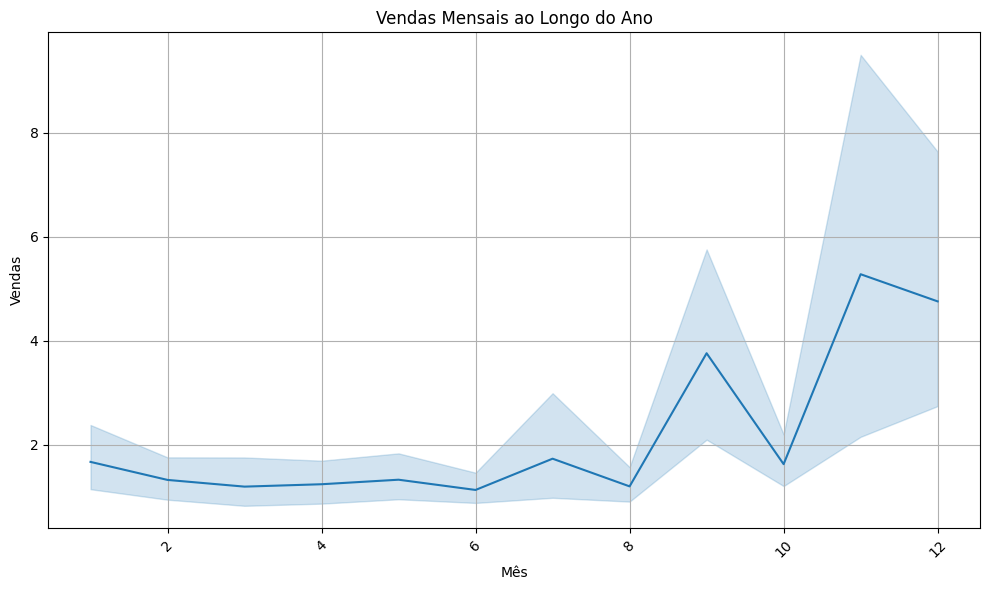

In [145]:
# Exibindo em gráfico as Vendas mensais
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='TOTAL UNITS', data=df)
plt.title('Vendas Mensais ')
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

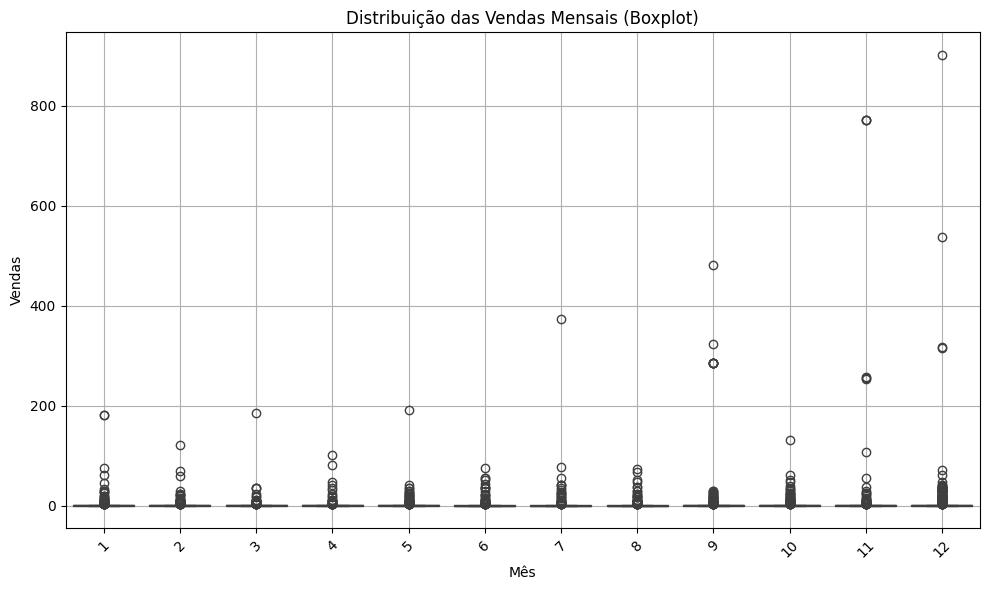

In [146]:
# Distribição das Vendas
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='TOTAL UNITS', data=df)
plt.title('Distribuição das Vendas Mensais (Boxplot)')
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [36]:
# Verificando os dados novamente.
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,year,month
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017,7
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016,9
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016,11
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016,9
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,10009,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016,11


In [25]:
# Normalmente O numero do apartamento é importante, mas irrelevante para essa análise.
# Portanto, está sendo retirado.
df = df.drop(columns='APARTMENT NUMBER', axis=1)

<ipython-input-30-30b0418e0804>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True,cmap='YlGnBu')


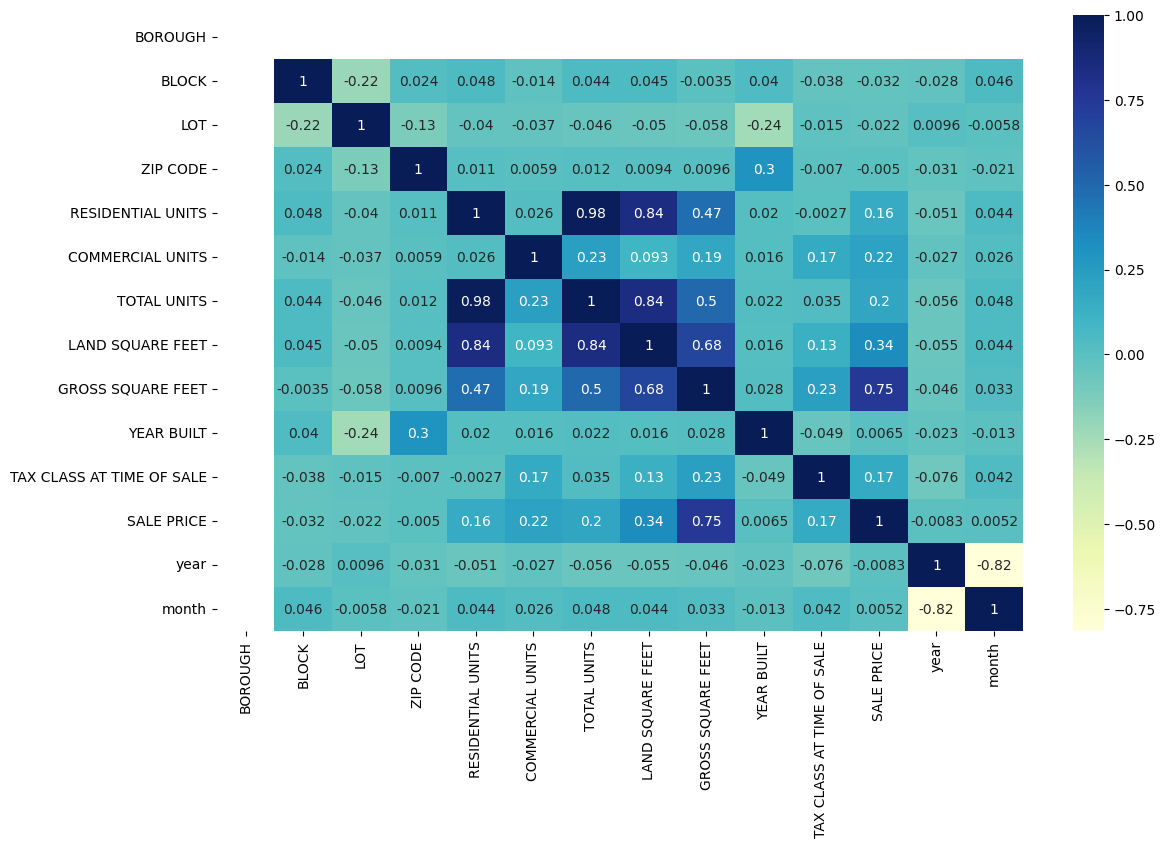

In [30]:
# Correlação entre as colunas.
plt.figure(figsize=(13,8))
sns.heatmap(df.corr(), annot=True,cmap='YlGnBu')
plt.show()

In [98]:
# Base escolhida para aplicar o ML que foi baseado no nivel de correlação entra as colunas e no quão relevante vai ser o dado para o Modelo escolhido.
# Deixei de fora dados importantes como "year","mouth" e "Total units", porque meu objetivo é prever o valor dos terrenos e acredito que estes não serão necessários.
df_base = df[['LOT', 'ZIP CODE',  'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT', 'SALE PRICE']]

In [147]:
# VErificando os dados pro modelo antes de trata-los
df_base.head(20)

,LOT,ZIP CODE,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
0,6,10009,1633.0,6440.0,1900,6625000.0
3,21,10009,2272.0,6794.0,1913,3936272.0
4,55,10009,2369.0,4615.0,1900,8000000.0
6,32,10009,1750.0,4226.0,1920,3192840.0
9,153,10009,4489.0,18523.0,1920,16232000.0
11,21,10009,3717.0,12350.0,2009,10350000.0
12,40,10009,2500.0,8574.0,1920,1.0
13,40,10009,2500.0,8574.0,1920,499000.0
14,40,10009,2500.0,8574.0,1920,10.0
15,40,10009,2500.0,8574.0,1920,529500.0


In [148]:
df_base.shape

(9029, 6)

In [149]:
# Removendo linhas que estão com dados faltantes do qual não posso substituir.
df_base = df_base[df_base['YEAR BUILT'] != 0]
df_base = df_base[df_base['ZIP CODE'] != 0]

In [151]:
# Verificando a quantia d elinhas
df_base.shape

(9029, 6)

In [152]:
df_base.head(10)

,LOT,ZIP CODE,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
0,6,10009,1633.0,6440.0,1900,6625000.0
3,21,10009,2272.0,6794.0,1913,3936272.0
4,55,10009,2369.0,4615.0,1900,8000000.0
6,32,10009,1750.0,4226.0,1920,3192840.0
9,153,10009,4489.0,18523.0,1920,16232000.0
11,21,10009,3717.0,12350.0,2009,10350000.0
12,40,10009,2500.0,8574.0,1920,1.0
13,40,10009,2500.0,8574.0,1920,499000.0
14,40,10009,2500.0,8574.0,1920,10.0
15,40,10009,2500.0,8574.0,1920,529500.0


In [106]:
# Y = preço do LOT, X = TOdos os outros dados escolhidos excento o Preço
Y =  df_base['SALE PRICE']
X = df_base.drop('SALE PRICE', axis=1)

In [161]:
# Separando os dados de treino e dados de teste
from sklearn.model_selection import train_test_split
X_treino,X_teste,y_treino,y_teste = train_test_split(X, Y)

In [166]:
# Importando a classe de Random Forest
from sklearn.ensemble import RandomForestRegressor


# Treinamento do modelo Random Forest, testando 100 arvores de decisão diferentes.
modelo_random = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_random.fit(X_treino,y_treino)

RandomForestRegressor(random_state=42)

In [167]:
# Predição feita
previsoes = modelo_random.predict(X_teste)
# Vizualização de algumas predições feitas pelo modelo
previsoes

In [169]:
# Verificando o erro quadrático do Random Forest
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_teste, previsoes)
print(f"Erro quadrático médio do Random Forest (MSE): {mse}")

Erro quadrático médio (MSE): 122482537315437.2


In [171]:
# Importando a classe de Regressão Linear
from sklearn.linear_model import LinearRegression

model_reg_linear = LinearRegression()
model_reg_linear.fit(X_treino, y_treino)

LinearRegression()

In [173]:
previsoes_reg_linear = model_reg_linear.predict(X_teste)

mse_reg_linear = mean_squared_error(y_teste, previsoes_reg_linear)
print(f"Erro quadrático médio (MSE) da Regressão Linear: {mse_reg_linear}")

Erro quadrático médio (MSE) da Regressão Linear: 154125248184636.25


In [176]:
# Importando a classe GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

modelo_gradient_bos = GradientBoostingRegressor(n_estimators=100, random_state=42)
# Treinando o modelo Gradient Boosting Regressor com os dados de treinamento
modelo_gradient_bos.fit(X_treino, y_treino)

GradientBoostingRegressor(random_state=42)

In [178]:
# Fazendo previsões no conjunto de teste
previsoes_gradient_bos = modelo_gradient_bos.predict(X_teste)
previsoes_gradient_bos

array([2097039.4557587 , 2172551.56774583, 2310757.92446201, ...,
       1028677.85575358, 3834509.6975035 , 4391425.3470682 ])

In [181]:
mse_gradient_bos = mean_squared_error(y_teste, previsoes_gradient_bos)
print(f"Erro quadrático médio (MSE) do Gradient Boosting Regressor: {mse_gradient_bos}")

Erro quadrático médio (MSE) do Gradient Boosting Regressor: 170662320995477.7
